In [155]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from keras import Sequential
from keras.layers import LSTM, Dense, Dropout, GRU, RNN
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,mean_absolute_percentage_error

In [8]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
dataset_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [81]:
dataset_train['Close'] = dataset_train['Close'].str.replace(r',', '', regex=True).astype("float")

In [85]:
dataset_train['Volume'] = dataset_train['Volume'].str.replace(r',', '', regex=True).astype("float")

In [33]:
dataset_train = dataset_train.drop(["Date"], axis=1)

In [183]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
 n_vars = 1 if type(data) is list else data.shape[1]
 df = DataFrame(data)
 cols, names = list(), list()
 # input sequence (t-n, ... t-1)
 for i in range(n_in, 0, -1):
  cols.append(df.shift(i))
  names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
 # forecast sequence (t, t+1, ... t+n)
 for i in range(0, n_out):
  cols.append(df.shift(-i))
  if i == 0:
    names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
  else:
    names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
 # put it all together
 agg = concat(cols, axis=1)
 agg.columns = names
 # drop rows with NaN values
 if dropnan:
  agg.dropna(inplace=True)
 return agg

# load dataset

train = dataset_train.values
# ensure all data is float
#values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(train)
# frame as supervised learning
reframed = series_to_supervised(scaled_train, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[6,7,8,9]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)   var1(t)
1   0.085814   0.096401   0.090449   0.237573   0.295258  0.097012
2   0.097012   0.098344   0.098235   0.241514   0.229936  0.094334
3   0.094334   0.092517   0.094086   0.228781   0.263612  0.091562
4   0.091562   0.088819   0.088006   0.216419   0.216179  0.079842
5   0.079842   0.076718   0.061070   0.178548   0.467797  0.064328


In [184]:
train = reframed.values
train_X, train_y = train[:, :-1], train[:, -1]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
print(train_X.shape, train_y.shape)

(1257, 1, 5) (1257,)


In [185]:
#test set
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
dataset_test = dataset_test.drop(["Date"], axis=1)

dataset_test['Volume'] = dataset_test['Volume'].str.replace(r',', '', regex=True).astype("float")

In [186]:
test = dataset_test.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_test = scaler.fit_transform(test)
reframed = series_to_supervised(scaled_test, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[6,7,8,9]], axis=1, inplace=True)
print(reframed.head())

test = reframed.values
test_X, test_y = test[:, :-1], test[:, -1]
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(test_X.shape, test_y.shape)

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)   var1(t)
1   0.000000   0.000000   0.000000   0.000000   0.317106  0.161864
2   0.161864   0.032683   0.143722   0.015344   0.066042  0.123220
3   0.123220   0.092699   0.180043   0.159095   0.178705  0.278814
4   0.278814   0.349197   0.320250   0.403998   0.309758  0.467627
5   0.467627   0.388761   0.527827   0.414092   0.151721  0.492373
(19, 1, 5) (19,)


Epoch 1/50
18/18 - 3s - loss: 0.3957 - val_loss: 0.3456 - 3s/epoch - 158ms/step
Epoch 2/50
18/18 - 0s - loss: 0.2673 - val_loss: 0.2051 - 95ms/epoch - 5ms/step
Epoch 3/50
18/18 - 0s - loss: 0.1575 - val_loss: 0.1050 - 87ms/epoch - 5ms/step
Epoch 4/50
18/18 - 0s - loss: 0.1001 - val_loss: 0.0875 - 84ms/epoch - 5ms/step
Epoch 5/50
18/18 - 0s - loss: 0.1028 - val_loss: 0.0861 - 90ms/epoch - 5ms/step
Epoch 6/50
18/18 - 0s - loss: 0.0926 - val_loss: 0.0763 - 95ms/epoch - 5ms/step
Epoch 7/50
18/18 - 0s - loss: 0.0756 - val_loss: 0.0777 - 97ms/epoch - 5ms/step
Epoch 8/50
18/18 - 0s - loss: 0.0659 - val_loss: 0.0816 - 86ms/epoch - 5ms/step
Epoch 9/50
18/18 - 0s - loss: 0.0562 - val_loss: 0.0857 - 101ms/epoch - 6ms/step
Epoch 10/50
18/18 - 0s - loss: 0.0465 - val_loss: 0.0917 - 98ms/epoch - 5ms/step
Epoch 11/50
18/18 - 0s - loss: 0.0418 - val_loss: 0.0923 - 88ms/epoch - 5ms/step
Epoch 12/50
18/18 - 0s - loss: 0.0407 - val_loss: 0.0925 - 86ms/epoch - 5ms/step
Epoch 13/50
18/18 - 0s - loss: 0.037

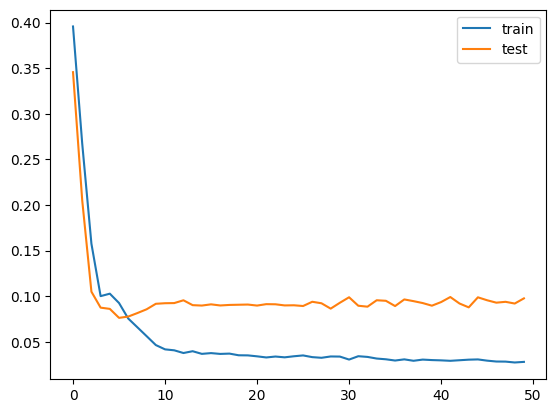

In [109]:
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=False))
model.add(Dropout(0.2))
#model.add(LSTM(units = 50, return_sequences = True))
#model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [110]:
predicted_stock_price = model.predict(test_X)

1/1 [==============================] - 0s 472ms/step


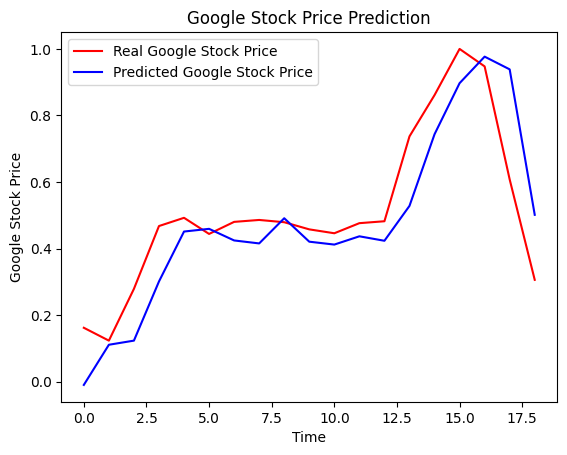

In [111]:
plt.plot(test_y, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

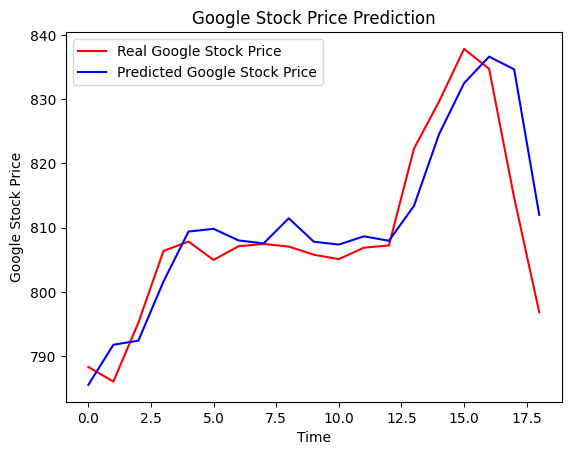

In [133]:
# unscaled version
prescaled = dataset_test.values
prescaled = series_to_supervised(prescaled, 1, 1)

# drop columns we don't want to predict
prescaled.drop(prescaled.columns[[6,7,8,9]], axis=1, inplace=True)
_, test_y = prescaled.values[:, :-1], prescaled.values[:, -1]
test_y = test_y.reshape(-1,1)

sc = MinMaxScaler(feature_range=(0, 1))
scaled = sc.fit_transform(test_y)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

plt.plot(test_y, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [137]:
#metrics
rmse = np.sqrt(mean_squared_error(test_y, predicted_stock_price))
r2 = r2_score(test_y, predicted_stock_price)
mape = mean_absolute_percentage_error(test_y, predicted_stock_price)
mae = mean_absolute_error(test_y, predicted_stock_price)

print('Test RMSE: %.3f' % rmse)
print('Test R2: %.3f' % r2)
print('Test MAPE: %.3f' % mape)
print('Test MAE: %.3f' % mae)

Test RMSE: 6.865
Test R2: 0.743
Test MAPE: 0.006
Test MAE: 4.788


adding multiple windows

In [142]:
n_windows = 10
n_features = 5
n_obs = n_windows * n_features

In [149]:
#train
reframedtrain = series_to_supervised(scaled_train, n_windows, 1)
train = reframedtrain.values
train_X, train_y = train[:, :n_obs], train[:, -n_features]
train_X = train_X.reshape((train_X.shape[0], n_windows, n_features))
print(train_X.shape, train_y.shape)


(1248, 10, 5) (1248,)


In [150]:
#testset
reframedtest = series_to_supervised(scaled_test, n_windows, 1)
test = reframedtest.values
test_X, test_y = test[:, :n_obs], test[:, -n_features]
test_X = test_X.reshape((test_X.shape[0], n_windows, n_features))
print(test_X.shape, test_y.shape)

(10, 10, 5) (10,)


Epoch 1/50
18/18 - 7s - loss: 0.1284 - val_loss: 0.1926 - 7s/epoch - 365ms/step
Epoch 2/50
18/18 - 0s - loss: 0.1161 - val_loss: 0.1958 - 180ms/epoch - 10ms/step
Epoch 3/50
18/18 - 0s - loss: 0.1448 - val_loss: 0.2461 - 182ms/epoch - 10ms/step
Epoch 4/50
18/18 - 0s - loss: 0.0589 - val_loss: 0.1990 - 191ms/epoch - 11ms/step
Epoch 5/50
18/18 - 0s - loss: 0.0489 - val_loss: 0.1859 - 173ms/epoch - 10ms/step
Epoch 6/50
18/18 - 0s - loss: 0.0492 - val_loss: 0.2092 - 185ms/epoch - 10ms/step
Epoch 7/50
18/18 - 0s - loss: 0.0518 - val_loss: 0.2156 - 174ms/epoch - 10ms/step
Epoch 8/50
18/18 - 0s - loss: 0.0457 - val_loss: 0.2067 - 177ms/epoch - 10ms/step
Epoch 9/50
18/18 - 0s - loss: 0.0418 - val_loss: 0.2103 - 185ms/epoch - 10ms/step
Epoch 10/50
18/18 - 0s - loss: 0.0393 - val_loss: 0.1959 - 179ms/epoch - 10ms/step
Epoch 11/50
18/18 - 0s - loss: 0.0436 - val_loss: 0.1867 - 171ms/epoch - 9ms/step
Epoch 12/50
18/18 - 0s - loss: 0.0389 - val_loss: 0.1949 - 189ms/epoch - 10ms/step
Epoch 13/50
18/1

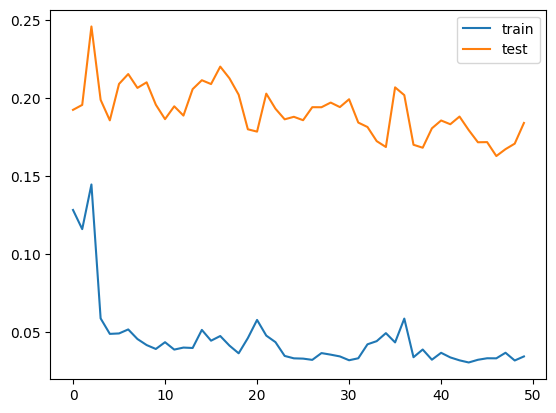

In [151]:
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=False))
model.add(Dropout(0.2))
#model.add(LSTM(units = 50, return_sequences = True))
#model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [154]:
predicted_stock_price = model.predict(test_X)

1/1 [==============================] - 0s 80ms/step


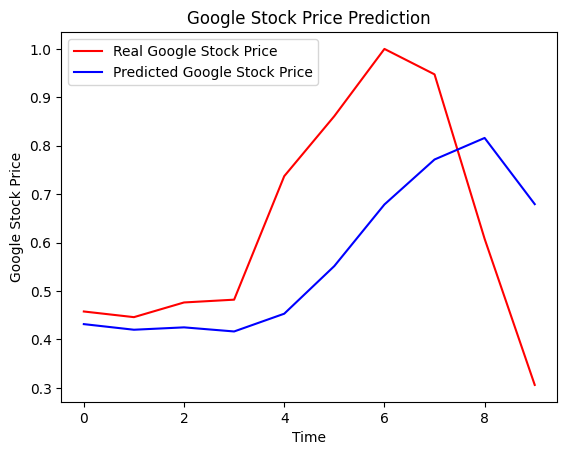

In [153]:
plt.plot(test_y, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

GRU, 1 window

Epoch 1/50
18/18 - 5s - loss: 0.3789 - val_loss: 0.1953 - 5s/epoch - 283ms/step
Epoch 2/50
18/18 - 0s - loss: 0.2041 - val_loss: 0.0795 - 282ms/epoch - 16ms/step
Epoch 3/50
18/18 - 0s - loss: 0.1429 - val_loss: 0.1301 - 285ms/epoch - 16ms/step
Epoch 4/50
18/18 - 0s - loss: 0.1458 - val_loss: 0.1076 - 296ms/epoch - 16ms/step
Epoch 5/50
18/18 - 0s - loss: 0.1203 - val_loss: 0.0856 - 363ms/epoch - 20ms/step
Epoch 6/50
18/18 - 0s - loss: 0.0964 - val_loss: 0.0795 - 245ms/epoch - 14ms/step
Epoch 7/50
18/18 - 0s - loss: 0.0746 - val_loss: 0.0812 - 201ms/epoch - 11ms/step
Epoch 8/50
18/18 - 0s - loss: 0.0575 - val_loss: 0.0898 - 159ms/epoch - 9ms/step
Epoch 9/50
18/18 - 0s - loss: 0.0486 - val_loss: 0.0945 - 95ms/epoch - 5ms/step
Epoch 10/50
18/18 - 0s - loss: 0.0456 - val_loss: 0.0916 - 82ms/epoch - 5ms/step
Epoch 11/50
18/18 - 0s - loss: 0.0445 - val_loss: 0.0904 - 82ms/epoch - 5ms/step
Epoch 12/50
18/18 - 0s - loss: 0.0442 - val_loss: 0.0980 - 88ms/epoch - 5ms/step
Epoch 13/50
18/18 - 0s -

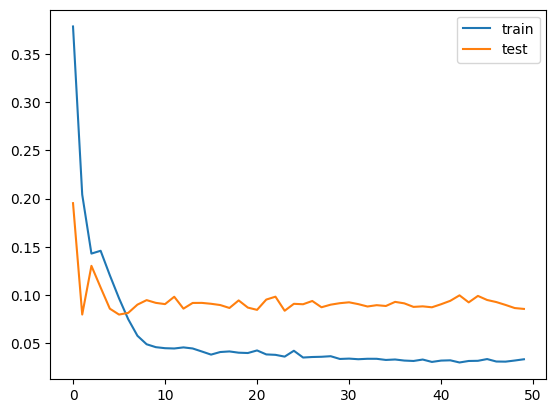

In [194]:
model = Sequential()
model.add(GRU(50, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=False))
model.add(Dropout(0.2))
#model.add(LSTM(units = 50, return_sequences = True))
#model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
#GRU overfits less

In [195]:
predicted_stock_price = model.predict(test_X)

1/1 [==============================] - 0s 452ms/step


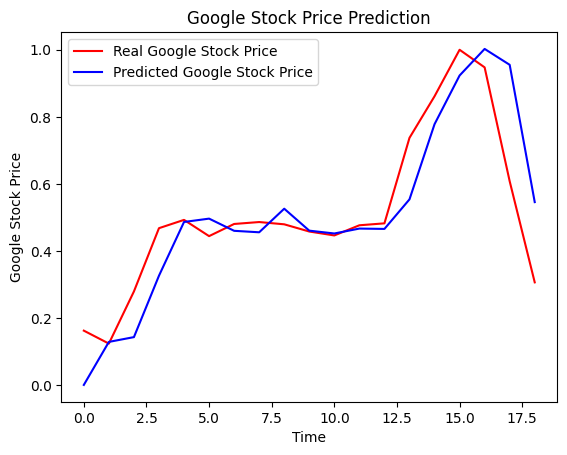

In [196]:
plt.plot(test_y, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [197]:
#metrics
rmse = np.sqrt(mean_squared_error(test_y, predicted_stock_price))
r2 = r2_score(test_y, predicted_stock_price)
mape = mean_absolute_percentage_error(test_y, predicted_stock_price)
mae = mean_absolute_error(test_y, predicted_stock_price)

print('Test RMSE: %.3f' % rmse)
print('Test R2: %.3f' % r2)
print('Test MAPE: %.3f' % mape)
print('Test MAE: %.3f' % mae)

Test RMSE: 0.126
Test R2: 0.701
Test MAPE: 0.215
Test MAE: 0.085
